In [1]:
# Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import tensorflow as tf
import os
import zipfile
import cv2
import glob
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
size=100

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
org_folder = '/content/drive/MyDrive/full_forg'
forg_folder = '/content/drive/MyDrive/full_forg'

In [ ]:
org_folder = '/content/drive/MyDrive/full_forg'
forg_folder = '/content/drive/MyDrive/full_forg'

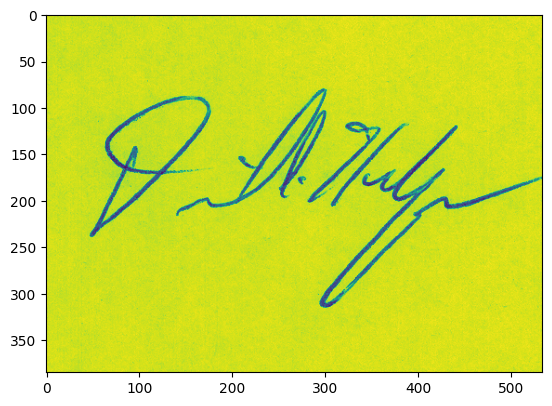

In [8]:
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/full_org/original_10_1.png')
plt.imshow(img)

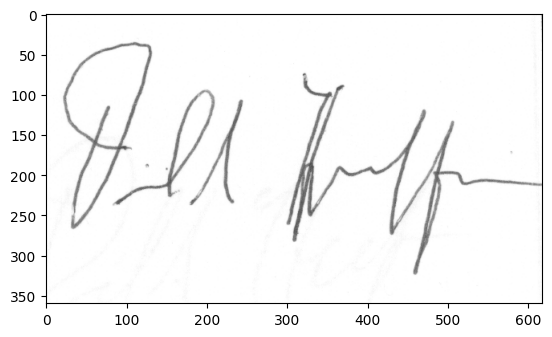

In [9]:
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/full_forg/forgeries_10_1.png')
plt.imshow(img)

In [10]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths to the original and forged folders
org_folder = '/content/drive/MyDrive/full_org'
forg_folder = '/content/drive/MyDrive/full_forg'

# Destination folders
train_dir1 = 'train1'
test_dir1 = 'test1'

# Directories for train/test splits
for dir_path in [train_dir1, test_dir1]:
    os.makedirs(os.path.join(dir_path, 'original'), exist_ok=True)
    os.makedirs(os.path.join(dir_path, 'forged'), exist_ok=True)

# Listing all the images in each folder
original_images = [f for f in os.listdir(org_folder) if os.path.isfile(os.path.join(org_folder, f))]
forged_images = [f for f in os.listdir(forg_folder) if os.path.isfile(os.path.join(forg_folder, f))]

# Spliting data (80% train, 20% test)
train_original, test_original = train_test_split(original_images, test_size=0.2, random_state=42)
train_forged, test_forged = train_test_split(forged_images, test_size=0.2, random_state=42)

# Moving images to respective train/test folders
def move_images(images, source_folder, dest_folder):
    for image in images:
        shutil.copy(os.path.join(source_folder, image), os.path.join(dest_folder, image))

# Moving original images
move_images(train_original, org_folder, os.path.join(train_dir1, 'original'))
move_images(test_original, org_folder, os.path.join(test_dir1, 'original'))

# Moving forged images
move_images(train_forged, forg_folder, os.path.join(train_dir1, 'forged'))
move_images(test_forged, forg_folder, os.path.join(test_dir1, 'forged'))

print("Data split and organized into train/test folders successfully.")


Data split and organized into train/test folders successfully.


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the train and test directories
train_dir = 'train1'
test_dir = 'test1'

# ImageDataGenerators for training and testing (rescaling to normalize pixel values)
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Batches of tensor image data with real-time data augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2110 images belonging to 2 classes.
Found 530 images belonging to 2 classes.


In [12]:
from tensorflow.keras import layers, models

# Basic CNN model
Cnnmodel = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
Cnnmodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = Cnnmodel.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 23s 221ms/step - accuracy: 0.5243 - loss: 0.7314 - val_accuracy: 0.6738 - val_loss: 0.5959
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6875 - loss: 0.6034 - val_accuracy: 0.7778 - val_loss: 0.5642
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 29s 129ms/step - accuracy: 0.7002 - loss: 0.5860 - val_accuracy: 0.7637 - val_loss: 0.5190
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.7500 - loss: 0.5452 - val_accuracy: 0.7222 - val_loss: 0.4529
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.7570 - loss: 0.5108 - val_accuracy: 0.7266 - val_loss: 0.5115
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.8125 - loss: 0.4389 - val_accuracy: 0.9444 - val_loss: 0.2514
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.7948 - loss: 0.4672 - val_accuracy: 0.8145 - val_loss: 0.4157
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.8438 - loss: 0.4000 - val_accuracy:

In [13]:
Cnnmodel.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,359,365 (39.52 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,906,244 (26.35 MB)

In [14]:
test_loss, test_accuracy = Cnnmodel.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.8429 - loss: 0.3754
Test Accuracy: 84.91%
Test Loss: 0.3689


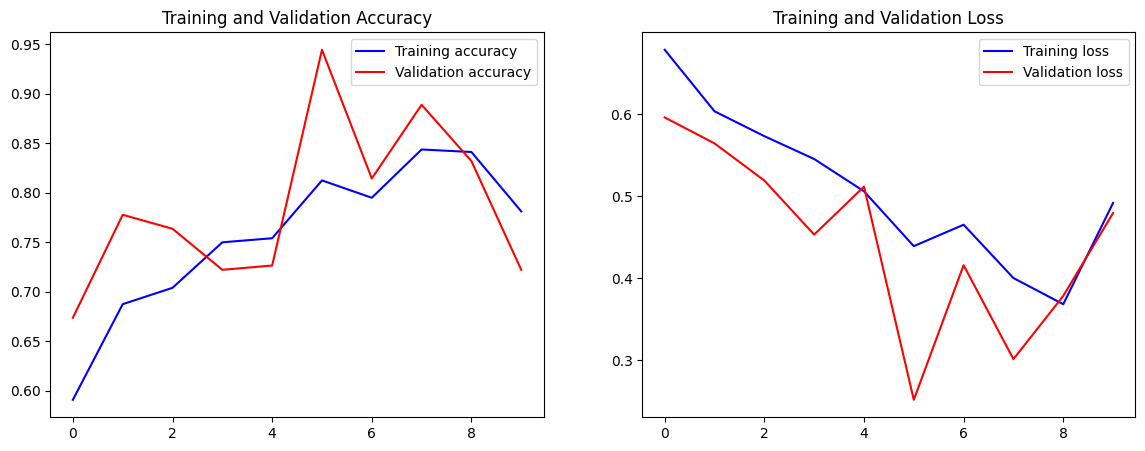

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predicting classes
predictions = (Cnnmodel.predict(validation_generator) > 0.5).astype("int32")
true_labels = validation_generator.classes

# classification report
print(classification_report(true_labels, predictions, target_names=['original', 'forged']))


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
              precision    recall  f1-score   support

    original       0.49      0.46      0.47       265
      forged       0.49      0.52      0.50       265

    accuracy                           0.49       530
   macro avg       0.49      0.49      0.49       530
weighted avg       0.49      0.49      0.49       530



In [17]:
Cnnmodel.save('Basic_Cnnmodel.h5')


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#predictions
predictions = Cnnmodel.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)

predicted_labels = (predictions > 0.5).astype(int)  # Assuming binary classification

#true labels from the generator
true_labels = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())  # ['original', 'forged']


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step


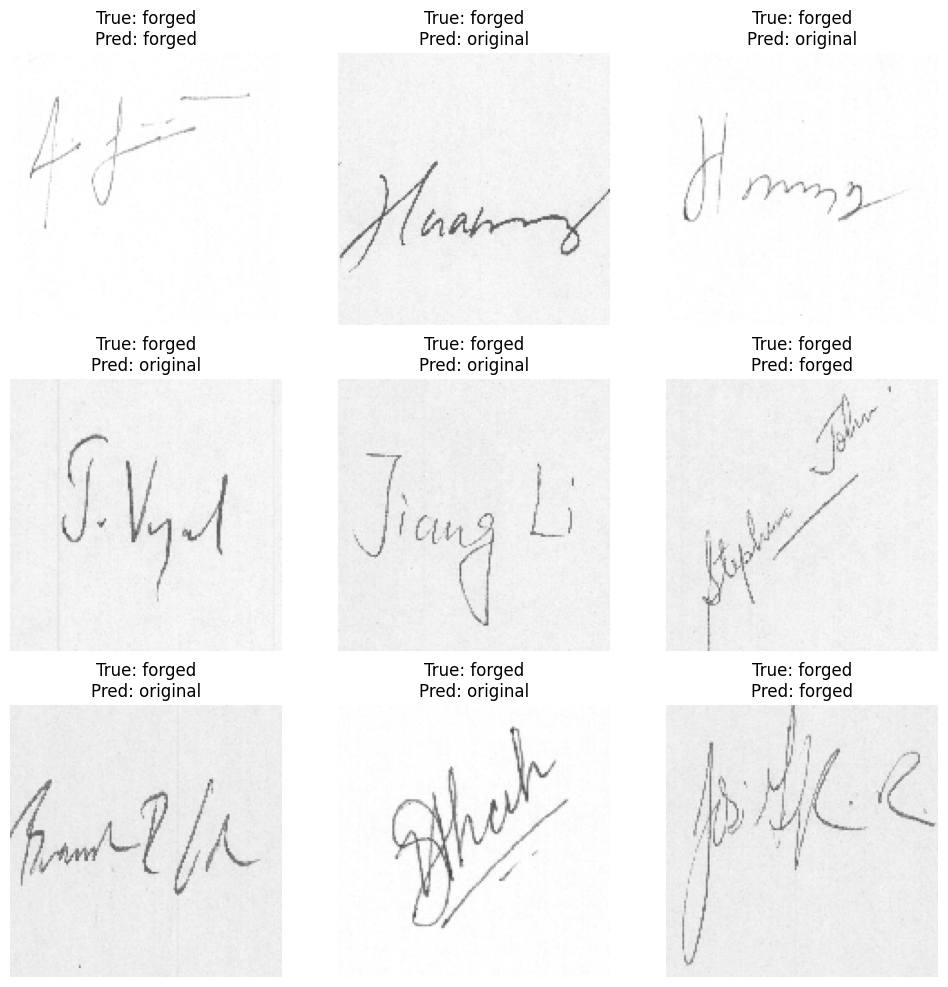

In [19]:
#Few sample images with predictions
plt.figure(figsize=(12, 12))
for i in range(9):  # Display first 9 images
    plt.subplot(3, 3, i + 1)

    #Image and true label
    img, true_label = validation_generator[i][0][0], true_labels[i]

    #Showing image
    plt.imshow(img)
    plt.axis('off')

    #Predicted label
    pred_label = predicted_labels[i][0]  # Extract prediction for the image
    plt.title(f"True: {class_labels[true_label]}\nPred: {class_labels[pred_label]}")
plt.show()


In [20]:
for i, filename in enumerate(validation_generator.filenames):
  print("Image: forgeries_10_13.png")
  print(f"  True Label: {class_labels[true_labels[i]]}")
  print(f"  Predicted Label: {class_labels[predicted_labels[i][0]]}\n")


Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: forged

Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: original

Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: original

Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: original

Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: original

Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: forged

Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: original

Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: original

Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: forged

Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: original

Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: original

Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: forged

Image: forgeries_10_13.png
  True Label: forged
  Predicted Label: forged

Image: fo

IndexError: index 512 is out of bounds for axis 0 with size 512

In [21]:
#VGG16 model

from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Set up the generators
train_generator = train_datagen.flow_from_directory(
    'train1',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    'test1',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Building the model
vgg_model = models.Sequential()
vgg_model.add(base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(256, activation='relu'))
vgg_model.add(layers.Dropout(0.5))
vgg_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trainning the model
history = vgg_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)




Found 2110 images belonging to 2 classes.
Found 530 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 87s 901ms/step - accuracy: 0.5070 - loss: 2.1079 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - accuracy: 0.4788 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 270ms/step - accuracy: 0.4774 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 279ms/step - accuracy: 0.4942 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 269ms/step - accuracy: 0.4789 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step - accuracy: 0.4941 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 319ms/step - accuracy: 0.5221 - loss: 0.6930 - val

In [22]:
#VGG16 model evaluation

test_loss, test_accuracy = vgg_model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.8050 - loss: 0.6923
Test Accuracy: 50.00%
Test Loss: 0.6931


In [23]:
#Data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


train_generator = train_datagen.flow_from_directory(
    'train1',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2110 images belonging to 2 classes.


In [24]:
from tensorflow.keras.applications import VGG16

# Loading  VGG16 model pretrained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Initially freeze the layers

# new model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [25]:
# Unfreezing the top layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-4]:  # Adjust the number of layers to unfreeze
    layer.trainable = False


In [26]:
# Unfreezing the top layers of VGG16 for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-4]:  # Freeze all but the last 4 layers
    layer.trainable = False

# Recompiling with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tuning the model
history_fine = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 508ms/step - accuracy: 0.5291 - loss: 0.7895 - val_accuracy: 0.7736 - val_loss: 0.5565
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 320ms/step - accuracy: 0.6647 - loss: 0.6206 - val_accuracy: 0.8547 - val_loss: 0.4148
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 312ms/step - accuracy: 0.7791 - loss: 0.4893 - val_accuracy: 0.9358 - val_loss: 0.2633
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 329ms/step - accuracy: 0.8716 - loss: 0.3385 - val_accuracy: 0.9717 - val_loss: 0.1551
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 310ms/step - accuracy: 0.9333 - loss: 0.1981 - val_accuracy: 0.9887 - val_loss: 0.0699


In [27]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.9853 - loss: 0.0643
Test Accuracy: 98.87%
Test Loss: 0.0699


In [28]:
# Modifing model architecture

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())  # Alternative to Flatten
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load ResNet50 without the top classification layer
Resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

Resnet_model = models.Sequential([
    Resnet_model,
    layers.GlobalAveragePooling2D(),  # Global pooling layer to reduce output dimensions
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout layer for regularization
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with binary crossentropy loss and Adam optimizer
Resnet_model.compile(optimizer=tf.keras.optimizers.Adam(1e-6), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tuning the model
history_fine = Resnet_model.fit(
    train_generator,
    epochs=10,  # You can try more epochs here
    validation_data=validation_generator
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 128s 937ms/step - accuracy: 0.5644 - loss: 0.7320 - val_accuracy: 0.5000 - val_loss: 0.7087
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 75s 386ms/step - accuracy: 0.6858 - loss: 0.5845 - val_accuracy: 0.5000 - val_loss: 0.7470
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 387ms/step - accuracy: 0.7598 - loss: 0.4898 - val_accuracy: 0.5000 - val_loss: 0.7795
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 387ms/step - accuracy: 0.8595 - loss: 0.3886 - val_accuracy: 0.5000 - val_loss: 0.8554
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 348ms/step - accuracy: 0.8947 - loss: 0.3148 - val_accuracy: 0.5000 - val_loss: 0.8987
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 337ms/step - accuracy: 0.9248 - loss: 0.2762 - val_accuracy: 0.5000 - val_loss: 0.8228
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 363ms/step - accuracy: 0.9351 - loss: 0.2251 - val_accuracy: 0.5019 - val_loss: 0.7840
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 362

In [30]:
test_loss, test_accuracy = Resnet_model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.2363 - loss: 1.0160
Test Accuracy: 51.89%
Test Loss: 0.7718


In [31]:
#Using InceptionV3 model

from tensorflow.keras.applications import InceptionV3

# Load the InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Build the model
Iv3_model= models.Sequential()
Iv3_model.add(base_model)
Iv3_model.add(layers.GlobalAveragePooling2D())
Iv3_model.add(layers.Dense(256, activation='relu'))
Iv3_model.add(layers.Dropout(0.5))
Iv3_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
Iv3_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_fine = Iv3_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9051 - loss: 0.2242 - val_accuracy: 0.5000 - val_loss: 584.8886
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 323ms/step - accuracy: 0.9879 - loss: 0.0458 - val_accuracy: 0.5000 - val_loss: 23.4716
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 326ms/step - accuracy: 0.9903 - loss: 0.0280 - val_accuracy: 0.5000 - val_loss: 15.0108
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 362ms/step - accuracy: 0.9955 - loss: 0.0316 - val_accuracy: 0.5000 - val_loss: 1.5118
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 308ms/step - accuracy: 0.9984 - loss: 0.0080 - val_accuracy: 0.5000 - val_loss: 2.6398


In [32]:
test_loss, test_accuracy = Iv3_model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.8050 - loss: 1.0365
Test Accuracy: 50.00%
Test Loss: 2.6398


In [34]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [35]:
# Hyperparameter tuning on VGG16


from kerastuner import Hyperband
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False  # Initially freeze the layers

    Vgg_modelhp = models.Sequential()
    Vgg_modelhp.add(base_model)
    Vgg_modelhp.add(layers.Flatten())

    # Tune the number of units in the Dense layer
    Vgg_modelhp.add(layers.Dense(units=hp.Int('units', min_value=128, max_value=512, step=64), activation='relu'))
    Vgg_modelhp.add(layers.Dropout(rate=hp.Float('dropout', 0.3, 0.7, step=0.1)))
    Vgg_modelhp.add(layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    Vgg_modelhp.compile(optimizer=tf.keras.optimizers.Adam(
                    hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return Vgg_modelhp

# Initialize the tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    directory='hyperparam_tuning',
    project_name='signature_verification'
)

# Perform the search
tuner.search(train_generator, epochs=10, validation_data=validation_generator)

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]
print(f"Best number of units: {best_hp.get('units')}")
print(f"Best dropout rate: {best_hp.get('dropout')}")
print(f"Best learning rate: {best_hp.get('learning_rate')}")


Trial 10 Complete [00h 00m 55s]
val_accuracy: 0.8584905862808228

Best val_accuracy So Far: 0.9056603908538818
Total elapsed time: 00h 10m 47s

Search: Running Trial #11

Value             |Best Value So Far |Hyperparameter
256               |448               |units
0.3               |0.4               |dropout
0.01              |0.001             |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
52/66 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.5639 - loss: 3.5388

KeyboardInterrupt: 

In [36]:
#Identifying best parameters

best_hp = tuner.get_best_hyperparameters()[0]
print(f"Best number of units: {best_hp.get('units')}")
print(f"Best dropout rate: {best_hp.get('dropout')}")
print(f"Best learning rate: {best_hp.get('learning_rate')}")


Best number of units: 448
Best dropout rate: 0.4
Best learning rate: 0.001


In [37]:
final_model = build_model(best_hp)
final_model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 359ms/step - accuracy: 0.5730 - loss: 1.0428 - val_accuracy: 0.8453 - val_loss: 0.4490
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 37s 324ms/step - accuracy: 0.7669 - loss: 0.5103 - val_accuracy: 0.8943 - val_loss: 0.3244
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - accuracy: 0.8267 - loss: 0.4143 - val_accuracy: 0.9075 - val_loss: 0.2909
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 325ms/step - accuracy: 0.8163 - loss: 0.4092 - val_accuracy: 0.8755 - val_loss: 0.2970
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - accuracy: 0.8626 - loss: 0.3328 - val_accuracy: 0.9340 - val_loss: 0.2122
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 310ms/step - accuracy: 0.8793 - loss: 0.3003 - val_accuracy: 0.9396 - val_loss: 0.1881
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - accuracy: 0.8826 - loss: 0.2902 - val_accuracy: 0.9585 - val_loss: 0.1373
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 304ms/step - accuracy: 0.9267 - loss: 0.2313 - val_accu

In [38]:
# Evaluating the model on the test data
test_loss, test_accuracy = final_model.evaluate(validation_generator)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.9756 - loss: 0.0855
Test Loss: 0.1082
Test Accuracy: 0.9736


In [39]:
#Save model

final_model.save('signature_verification_model.h5')


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step


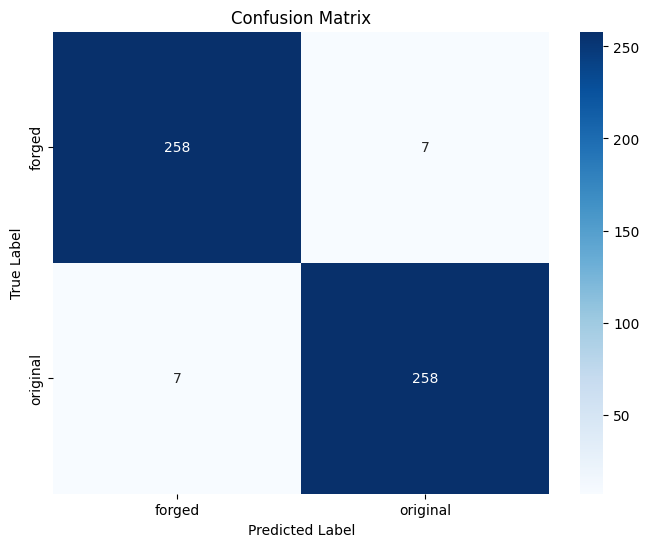

In [40]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
predictions = final_model.predict(validation_generator)
predicted_classes = np.where(predictions > 0.5, 1, 0)

# Generate the confusion matrix
cm = confusion_matrix(validation_generator.classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 351ms/step - accuracy: 0.7632 - loss: 0.4958 - val_accuracy: 0.8830 - val_loss: 0.3051
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 317ms/step - accuracy: 0.8177 - loss: 0.3863 - val_accuracy: 0.9302 - val_loss: 0.2500
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 24s 312ms/step - accuracy: 0.8714 - loss: 0.3249 - val_accuracy: 0.9491 - val_loss: 0.1745
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 363ms/step - accuracy: 0.8807 - loss: 0.2902 - val_accuracy: 0.8868 - val_loss: 0.2662
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 358ms/step - accuracy: 0.8801 - loss: 0.3062 - val_accuracy: 0.9642 - val_loss: 0.1361
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 312ms/step - accuracy: 0.8775 - loss: 0.2796 - val_accuracy: 0.9698 - val_loss: 0.1436
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 314ms/step - accuracy: 0.9093 - loss: 0.2331 - val_accuracy: 0.9623 - val_loss: 0.1436
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 44s 356ms/step - accuracy: 0.9004 - loss: 0.2556 - val_accu

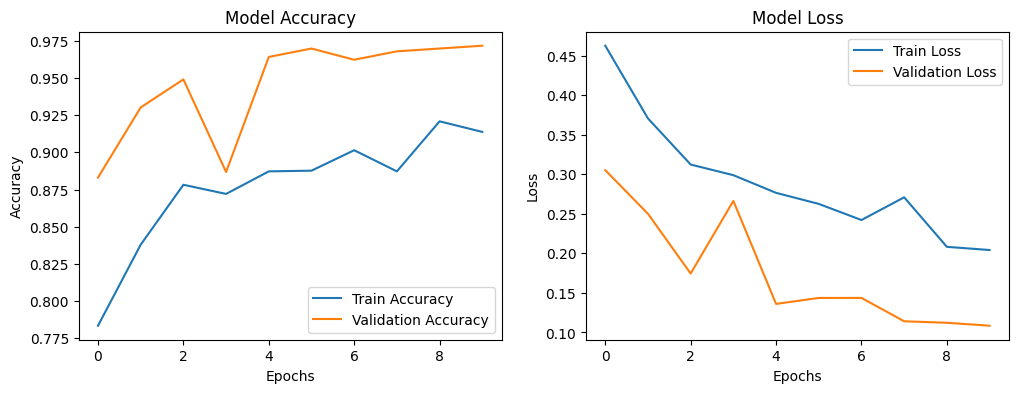

In [41]:
import matplotlib.pyplot as plt

history = tuner.get_best_models()[0].fit(train_generator, epochs=10, validation_data=validation_generator)

# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [66]:
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_input_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0

# Load and preprocess an input image
img_path = '/content/drive/MyDrive/full_forg/forgeries_46_23.png'  # can replace with any image path
input_image = preprocess_input_image(img_path)


predictions =  final_model.predict(input_image)
print(f"Predictions: {predictions}")

threshold = 0.5
confidence_score = predictions[0][0]
print(f"Confidence Score: {confidence_score:.2f}")

if confidence_score < threshold:
    print("The image is classified as FORGED.")
else:
    print("The image is classified as ORIGINAL.")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predictions: [[0.00522828]]
Confidence Score: 0.01
The image is classified as FORGED.


In [60]:
final_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 448)                 │       3,670,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             449 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,727,429 (98.14 MB)

 Trainable params: 3,670,913 (14.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 7,341,828 (28.01 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
             Accuracy  Precision  Recall  F1 Score
VGG16         1.00000        0.0     0.0       0.0
CNN           0.68750        0.0     0.0       0.0
Final Model   0.90625        0.0     0.0       0.0
InceptionV3   1.00000        0.0     0.0       0.0
ResNet50      0.00000        0.0     0.0       0.0


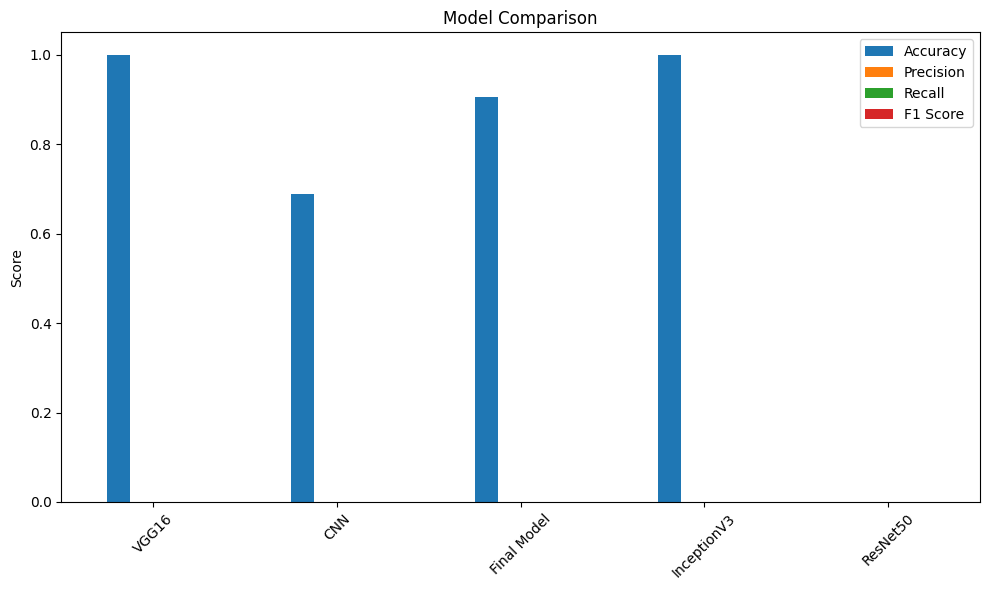

In [62]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


models = {'VGG16': vgg_model, 'CNN': Cnnmodel, 'Final Model': final_model, 'InceptionV3': Iv3_model, 'ResNet50': Resnet_model}

def evaluate_models(models, test_generator):
    results = {}

    for model_name, model in models.items():
        test_images, test_labels = next(test_generator)
        predictions = model.predict(test_images)

        predicted_labels = (predictions > 0.5).astype('int32')

        accuracy = accuracy_score(test_labels, predicted_labels)
        precision = precision_score(test_labels, predicted_labels)
        recall = recall_score(test_labels, predicted_labels)
        f1 = f1_score(test_labels, predicted_labels)

        results[model_name] = {'Accuracy': accuracy, 'Precision': precision,
                               'Recall': recall, 'F1 Score': f1}

    results_df = pd.DataFrame(results).T
    return results_df


results_df = evaluate_models(models, validation_generator)
print(results_df)

import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
